In [1]:
pwd

'C:\\Users\\clubc\\Desktop\\스마트팩토리 프로젝트\\process_anlaysis\\simulation_data_model'

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('./csv_data/2020_09_10_2107_1_elec89.99_temp489.99.csv')

In [4]:
dataset.head()

,item_key,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,op10_length,op10_width,op10_height,...,op50_height,op50_temperature,op50_process_time,op50_time_stamp,op60_test,op60_length,op60_width,op60_height,op60_process_time,op60_time_stamp
0,1,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,502.82,10,110,0,260.0,180.00,60.0,10,120
1,2,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,508.40,10,120,0,260.0,180.00,60.0,10,130
2,3,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,492.18,10,130,1,260.0,179.99,60.0,10,140
3,4,200.0,100.0,50.01,100.0,50.0,60.0,200.0,100,60.0,...,60.0,503.79,10,140,0,260.0,180.00,60.0,10,150
4,5,200.0,100.0,50.01,100.0,50.0,60.0,200.0,100,60.0,...,60.0,504.70,10,150,0,260.0,180.00,60.0,10,160


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14388 entries, 0 to 14387
Data columns (total 59 columns):
item_key                   14388 non-null int64
body_length                14388 non-null float64
body_width                 14388 non-null float64
body_height                14388 non-null float64
wavyfin_length             14388 non-null float64
wavyfin_width              14388 non-null float64
wavyfin_height             14388 non-null float64
op10_length                14388 non-null float64
op10_width                 14388 non-null int64
op10_height                14388 non-null float64
op10_electricity_sensor    14388 non-null float64
op10_process_time          14388 non-null int64
op10_test                  14388 non-null int64
op10_time_stamp            14388 non-null int64
pipe1_length               14388 non-null float64
pipe1_width                14388 non-null float64
pipe1_height               14388 non-null float64
op20_length                14388 non-null float64
o

In [5]:
X = dataset.drop(['op60_time_stamp', 'op60_process_time', 
                   'op60_height', 'op60_width', 'op60_length', 'op60_test', 
                   'op50_time_stamp', 'op50_process_time', 
                   'op50_height', 'op50_width', 'op50_length', 'op50_temperature',
                   'op40_time_stamp', 'op40_process_time', 
                   'op40_height', 'op40_width', 'op40_length', 'op40_temperature', 'op40_test',
                   'op30_time_stamp', 'op30_process_time', 
                   'op30_height', 'op30_width', 'op30_length', 'op30_electricity_sensor', 'op30_test',
                   'op20_time_stamp', 'op20_process_time', 
                   'op20_height', 'op20_width', 'op20_length', 'op20_electricity_sensor', 'op20_test',
                   'op10_time_stamp', 'op10_process_time', 
                   'op10_height', 'op10_width', 'op10_length', 'op10_electricity_sensor', 'op10_test',
                   'item_key'
                  ], axis = 1)
X.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,29.99,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
1,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,29.99,30,80,40,30.0,80.0,40.00
2,200.0,100.0,50.00,100.0,50.0,60.0,29.99,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.01
3,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
4,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00


In [6]:
y = dataset['op60_test']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: op60_test, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False, 
                                                    random_state=1004)

In [8]:
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,29.99,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
1,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,29.99,30,80,40,30.0,80.0,40.00
2,200.0,100.0,50.00,100.0,50.0,60.0,29.99,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.01
3,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
4,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00


In [9]:
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
11510,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,79.99,40.0
11511,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11512,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11513,199.99,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11514,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0


In [10]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: op60_test, dtype: int64

In [11]:
y_test.head()

11510    0
11511    0
11512    0
11513    0
11514    0
Name: op60_test, dtype: int64

In [12]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9805


In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.9752


In [14]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9826


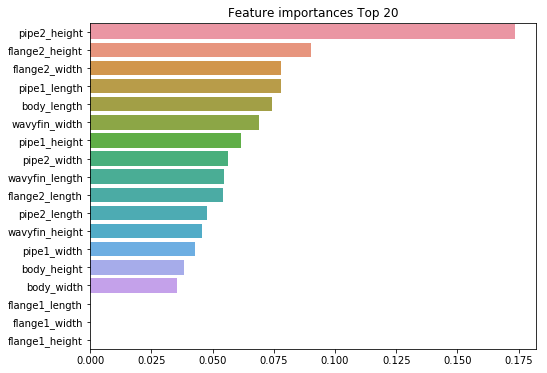

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()